In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = sns.color_palette('viridis')

from pyspark import SparkContext
import header as h

# start spark with 1 worker thread
sc = SparkContext("local[*]")
sc.setLogLevel("ERROR")

21/11/19 22:30:01 WARN Utils: Your hostname, pasokon resolves to a loopback address: 127.0.1.1; using 192.168.1.96 instead (on interface wlo1)
21/11/19 22:30:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/11/19 22:30:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/11/19 22:30:04 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
def preprocess(row: str):
    row = row.split(',')
    
    return ['NA' if x == "" else x for x in row] \
        if "" in row else row

In [3]:
def get_rdd(table_name, cache=True):
    entries = sc.textFile(f"./{table_name}.csv").map(preprocess)
    if cache: entries.cache()
    return entries

### What is the distribution of the machines according to their CPU capacity?

In [4]:
machine_events = get_rdd('machine_events')

In [5]:
cpus_index = h.get_column_index('cpus', h.get_table_header('machine_events'))

cpus = machine_events.map(lambda x: x[cpus_index])
cpus_dist = cpus.countByValue()
print(cpus_dist)

defaultdict(<class 'int'>, {'0.5': 35015, '0.25': 510, '1': 2223, 'NA': 32})


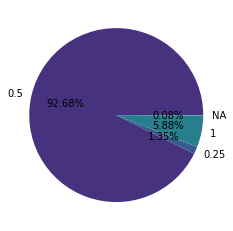

In [6]:
plt.pie(cpus_dist.values(), labels=cpus_dist.keys(), colors = colors, autopct='%.2f%%')
plt.show()


### On average, how many tasks compose a job?

In [7]:
import numpy as np
task_events = get_rdd('task_events')

job_id_idx = h.get_column_index('job ID', h.get_table_header('task_events'))
job = task_events.map(lambda x: x[job_id_idx])
task_per_job = list(job.countByValue().values())

np.mean(task_per_job), np.std(task_per_job) 

ValueError: 'job ID' is not in list